<a href="https://colab.research.google.com/github/Minhyuk03/KMOU-2025-2_ML/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B56%EC%A3%BC_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다항회귀

Mean Squared Error : 24.445461967891337
Mean Squared Error : 24.43365456641304


(2306, 84)

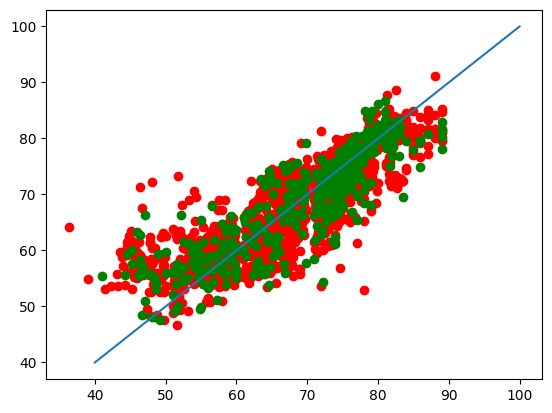

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# 데이터 불러오기
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
# life.head()
# 입력 데이터 X,출력 레이블 Y 준비
life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', "Thinness 1-19 years"]]
life.dropna(inplace = True)
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', "Thinness 1-19 years"]]
Y = life['Life expectancy']

# 다항 특징 생성
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 3) #3차 다항식으로 변환
X = poly_feature.fit_transform(X)

# 학습과 평가
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

Y_hat_train = lin_model.predict(X_train)
Y_hat_test = lin_model.predict(X_test)
plt.scatter(Y_train, Y_hat_train, color = 'r')
plt.scatter(Y_test, Y_hat_test, color = 'g')
plt.plot([40,100],[40,100])
# 실험 데이터
print("Mean Squared Error :",mean_squared_error(Y_test, Y_hat_test))
# 훈련데이터
print("Mean Squared Error :",mean_squared_error(Y_train, Y_hat_train))

X.shape

###실습목표
'https://github.com/dknife/ML/raw/main/data/'

의 데이터를 화면에 그려보고 이 데이터를 설명하느 회귀함수를 다항회귀를 이용하여 찾아보자. 그리고 회귀함수를 데이터의 독립변수 범위내에서 가시화 해라.

Train MSE: 0.27230362171797523
Test MSE: 0.2698714310466424


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


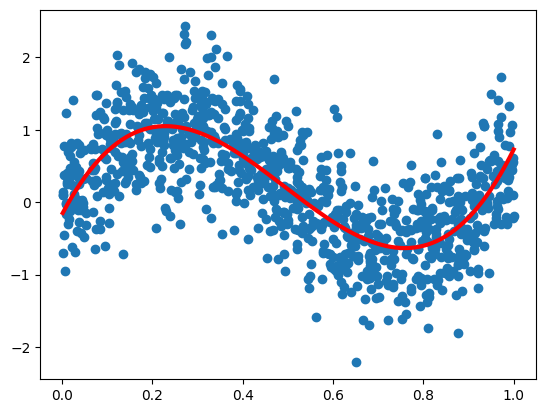

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data_url = 'https://github.com/dknife/ML/raw/main/data/nonlinear.csv'
df = pd.read_csv(data_url)

# 입력(x), 타깃(y) 준비
X = df[['x']]
y = df['y']

# 다항 특성 생성
poly_feat = PolynomialFeatures(degree=3) # 3차원
X_poly = poly_feat.fit_transform(X)

# 학습/평가 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# 평가
print('Train MSE:', mean_squared_error(y_train, y_train_pred))
print('Test MSE:', mean_squared_error(y_test, y_test_pred))

# 데이터 시각화
plt.scatter(X, y)
# 3차 다항식 선
import numpy as np
xx = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
yy = model.predict(poly_feat.transform(xx))
plt.plot(xx, yy, color='red', linewidth=3, label='poly fit')
plt.show()


iris data


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, Y = iris.data[:, [0, 1]], iris.target

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3,) # max_dept가 너무 깊어지면 오버피팅 발생 | 3가지 경우만 설정
dec_tree.fit(X, Y)

from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file='./dec_tree_for_iris.dot',
    feature_names = ['petal length (cm)', 'petal width (cm)'],
)

!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, Y = iris.data, iris.target # 0: sepal length, 1: sepal width만 사용

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, Y)

from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file='./dec_tree_sepal.dot',
    feature_names= iris.feature_names,
)

!dot -Tjpg dec_tree_iris.dot -o dec_tree_iris.jpg


Error: dot: can't open dec_tree_iris.dot


서포트 벡터머신

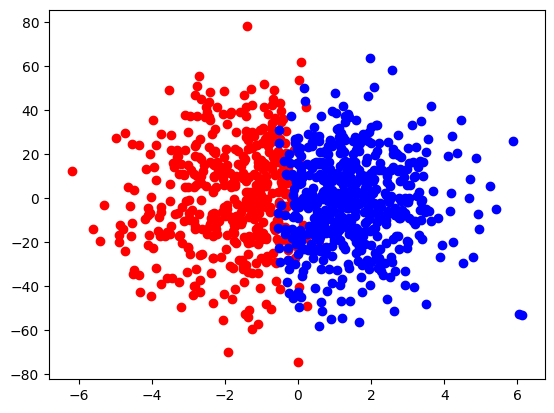

In [ ]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + "two_classes.csv")
# df.tail()

df_positive = df[df['y']>0]
df_negative = df[df['y'] == 0]
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color = 'r')
plt.scatter(df_negative['x1'], df_negative['x2'], color = 'b')
plt.show()

SVM

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


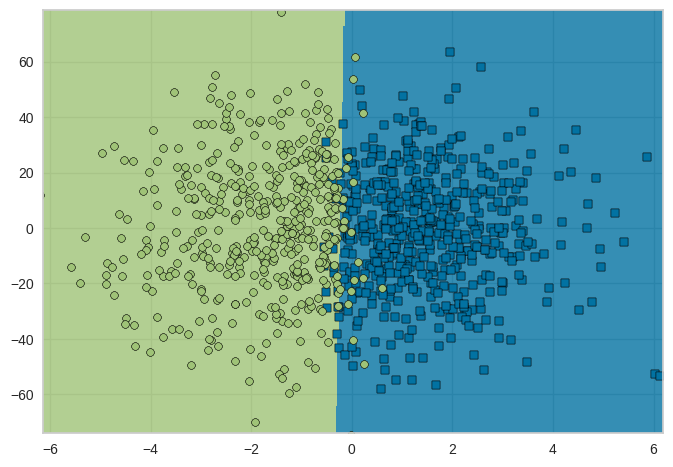

In [ ]:
from sklearn.svm import LinearSVC
X = df[['x1','x2']].to_numpy()
y = df['y']
svm_simple = LinearSVC(C=1, loss='hinge')
svm_simple.fit(X,y)

# 에측
svm_simple.predict([[0.12,0.56], [-4,40],[0,40],[5,20]])

from yellowbrick.contrib.classifier import DecisionViz
viz = DecisionViz(svm_simple, title = 'linear SVM')
viz.fit(X,y)
viz.draw(X,y)

*pipeline*

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_std = Pipeline([
    ("std", StandardScaler()),
    ("lsvm", LinearSVC(C=1, loss = 'hinge')),
])
svm_std.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('std', StandardScaler()),
                ('lsvm', LinearSVC(C=1, loss='hinge'))])

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


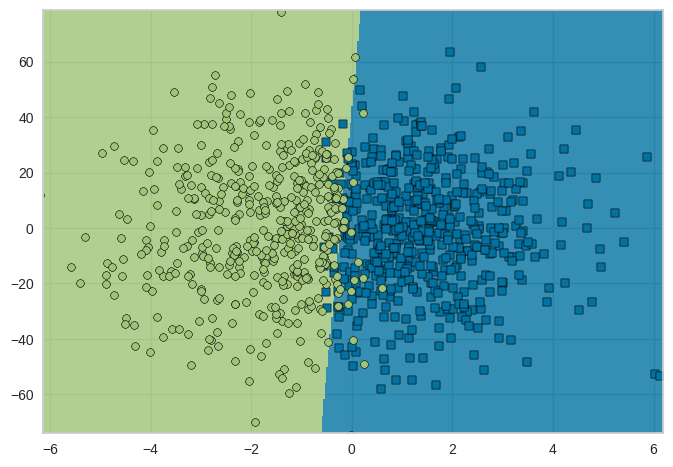

In [ ]:
from yellowbrick.contrib.classifier import DecisionViz
viz = DecisionViz(svm_simple, title = 'Standardzation - SVM')
viz.fit(X,y)
viz.draw(X,y)

다항 변환

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


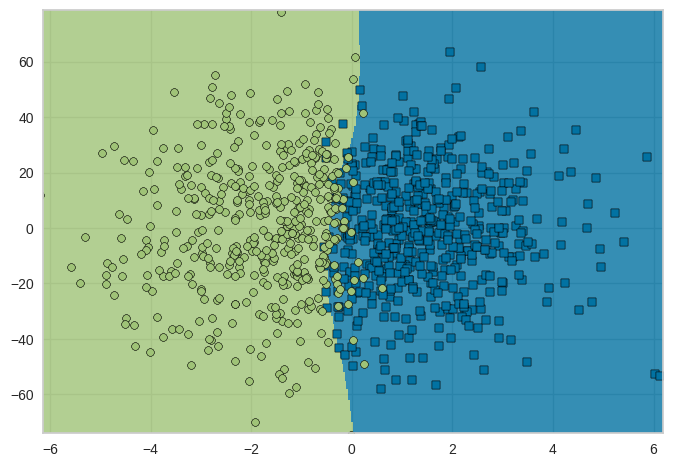

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
svm_poly = Pipeline([
    ('std', StandardScaler()),
    ("poly_inputs", PolynomialFeatures(degree=5)),
    ("lsvm", LinearSVC(C=0.01, loss='hinge'))
])
svm_poly.fit(X,y)
viz = DecisionViz(svm_poly, title="polynomail feature SVM")
viz.fit(X,y)
viz.draw(X,y)